<a href="https://colab.research.google.com/github/mrsaurabhtanwer/Sales-Forecasting-System-for-Retail/blob/main/Sales_Forecasting_System_for_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Project 1: Sales Forecasting System for Retail
# ==============================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [21]:
# Try importing Prophet
try:
    from prophet import Prophet
except ImportError:
    from fbprophet import Prophet

In [22]:
# Step 2: Load and Explore Data
data = pd.read_csv("/content/retail_sales.csv")  # Replace with actual file path
data['date'] = pd.to_datetime(data['date'])
data = data.groupby('date').sum().reset_index()

In [16]:
# Step 3: Prepare Data for Prophet
prophet_data = data.rename(columns={"date": "ds", "sales": "y"})

In [17]:
# Step 4: Initialize and Train Prophet Model
model = Prophet()
model.fit(prophet_data)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp60664rmg/wbjg8bga.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp60664rmg/84nk_uu_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12981', 'data', 'file=/tmp/tmp60664rmg/wbjg8bga.json', 'init=/tmp/tmp60664rmg/84nk_uu_.json', 'output', 'file=/tmp/tmp60664rmg/prophet_model7bjyv3sw/prophet_model-20250409071210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
# Step 5: Make Future DataFrame
future = model.make_future_dataframe(periods=90)  # Predict next 90 days
forecast = model.predict(future)


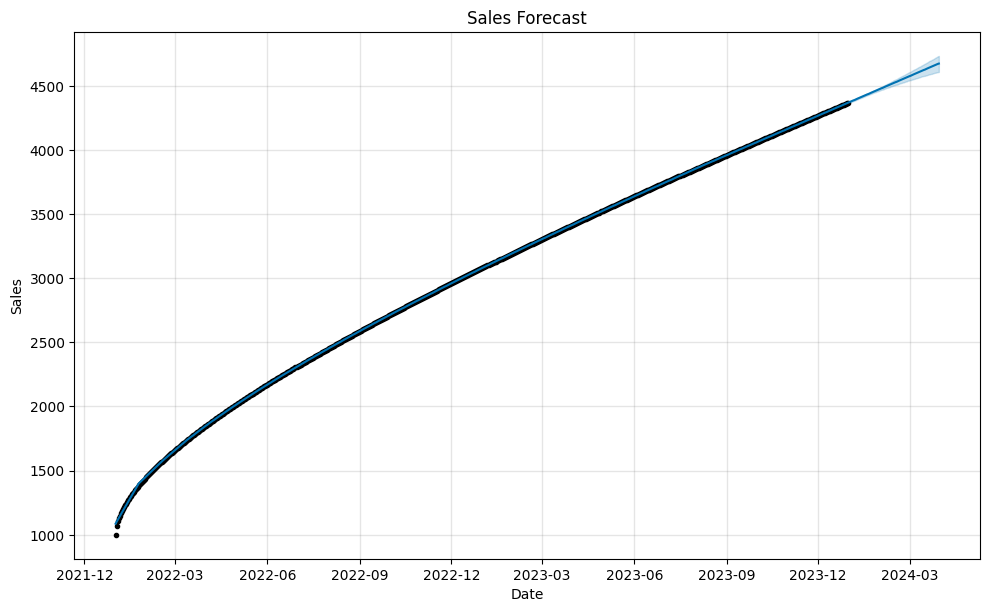

In [19]:
# Step 6: Plot Forecast
model.plot(forecast)
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [20]:
# Step 7: Save Forecast to CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("sales_forecast.csv", index=False)

# Step 8: Deploy (Optional)
# Use Streamlit to deploy (not included in this file)
# Save this code and create a new app.py file using Streamlit for deployment
